In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r'data.csv')

# Patrzymy jak zaimportowało z csv

In [2]:
df.head()

,Bn;Un;Ln;Cn;Dn;Dn-Cn;n;k
0,35;374;5;7083;7967;884;1000;0;
1,40;358;5;7454;8342;888;1000;1;
2,22;365;6;7288;10024;2736;1000;2;
3,51;376;6;6852;10914;4062;1000;3;
4,17;378;5;7883;8400;517;1000;4;


In [3]:
# dropping null value columns to avoid errors
df.dropna(inplace = True)
 
# new data frame with split value columns
new = df["Bn;Un;Ln;Cn;Dn;Dn-Cn;n;k"].str.split(";", n = 7, expand = True)
 
df["Bn"]= new[0]
df["Un"]= new[1]
df["Ln"]= new[2]
df["Cn"]= new[3]
df["Dn"]= new[4]
df["Dn-Cn"]= new[5]
df["n"]= new[6]
df["k"]= new[7]
df["k"]=df["k"].str.replace(";","")

# Dropping old Name column
df.drop(columns =["Bn;Un;Ln;Cn;Dn;Dn-Cn;n;k"], inplace = True)
 
# df display
df

,Bn,Un,Ln,Cn,Dn,Dn-Cn,n,k
0,35,374,5,7083,7967,884,1000,0
1,40,358,5,7454,8342,888,1000,1
2,22,365,6,7288,10024,2736,1000,2
3,51,376,6,6852,10914,4062,1000,3
4,17,378,5,7883,8400,517,1000,4
...,...,...,...,...,...,...,...,...
4995,129,36883,8,1282500,1440887,158387,100000,45
4996,297,36793,8,1338506,1389515,51009,100000,46
4997,339,36917,7,1122016,1369936,247920,100000,47
4998,112,36729,7,1173914,1398016,224102,100000,48


# Teraz wyglada lepiej

In [4]:
df.head()

,Bn,Un,Ln,Cn,Dn,Dn-Cn,n,k
0,35,374,5,7083,7967,884,1000,0
1,40,358,5,7454,8342,888,1000,1
2,22,365,6,7288,10024,2736,1000,2
3,51,376,6,6852,10914,4062,1000,3
4,17,378,5,7883,8400,517,1000,4


In [5]:
df.dtypes

Bn       object
Un       object
Ln       object
Cn       object
Dn       object
Dn-Cn    object
n        object
k        object
dtype: object

# Dla intów szybciej robi wykresiki (ZNACZNIE)

In [6]:
df = df.astype(int)

In [7]:
df.dtypes

Bn       int32
Un       int32
Ln       int32
Cn       int32
Dn       int32
Dn-Cn    int32
n        int32
k        int32
dtype: object

# Średnie dla danego n

In [8]:
df2=df.groupby('n', as_index=False).mean()
df2

,n,Bn,Un,Ln,Cn,Dn,Dn-Cn,k
0,1000,43.32,366.16,5.40,7421.38,9846.22,2424.84,24.5
1,2000,60.74,733.42,5.86,15872.84,20932.96,5060.12,24.5
2,3000,74.52,1102.40,6.10,25777.72,33348.18,7570.46,24.5
3,4000,72.44,1468.40,6.40,35846.20,45018.58,9172.38,24.5
4,5000,80.86,1837.44,6.34,45137.10,56810.24,11673.14,24.5
...,...,...,...,...,...,...,...,...
95,96000,363.36,35318.52,7.70,1158050.16,1422827.68,264777.52,24.5
96,97000,405.38,35672.24,7.70,1207628.44,1439265.22,231636.78,24.5
97,98000,380.78,36046.22,7.64,1147761.56,1473897.72,326136.16,24.5
98,99000,378.20,36415.68,7.54,1174613.50,1436608.50,261995.00,24.5


In [9]:
df2["Bn"]

0      43.32
1      60.74
2      74.52
3      72.44
4      80.86
       ...  
95    363.36
96    405.38
97    380.78
98    378.20
99    384.74
Name: Bn, Length: 100, dtype: float64

# WYKRESIKI

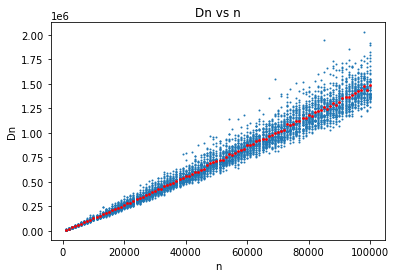

In [10]:
plt.scatter(df["n"], df["Dn"], s=1)             #here we do the graph
plt.scatter(df["n"].unique(), df2["Dn"], s=3, color= "red")
plt.title('Dn vs n')
plt.xlabel('n')
plt.ylabel('Dn')
plt.savefig("Dn_vs_n.pdf")

plt.show()

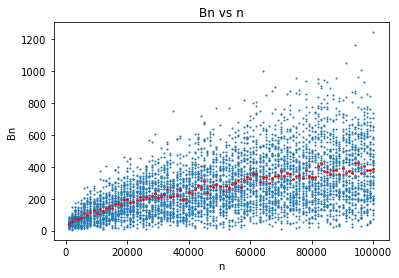

In [11]:
plt.scatter(df["n"], df["Bn"], s=1)             #here we do the graph
plt.scatter(df["n"].unique(), df2["Bn"], s=3, color= "red")
plt.title('Bn vs n')
plt.xlabel('n')
plt.ylabel('Bn')
plt.savefig("Bn_vs_n.pdf")

plt.show()

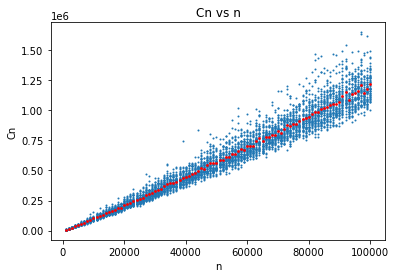

In [12]:
plt.scatter(df["n"], df["Cn"], s=1)             #here we do the graph
plt.scatter(df["n"].unique(), df2["Cn"], s=3, color= "red")
plt.title('Cn vs n')
plt.xlabel('n')
plt.ylabel('Cn')
plt.savefig("Cn_vs_n.pdf")

plt.show()

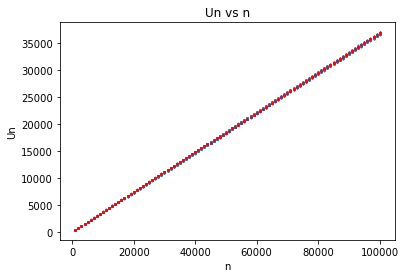

In [13]:
plt.scatter(df["n"], df["Un"], s=1)             #here we do the graph
plt.scatter(df["n"].unique(), df2["Un"], s=3, color= "red")
plt.title('Un vs n')
plt.xlabel('n')
plt.ylabel('Un')
plt.savefig("Un_vs_n.pdf")

plt.show()

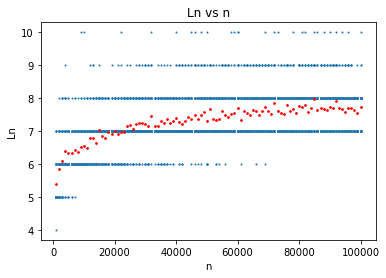

In [14]:
plt.scatter(df["n"], df["Ln"], s=1)             #here we do the graph
plt.scatter(df["n"].unique(), df2["Ln"], s=3, color= "red")
plt.title('Ln vs n')
plt.xlabel('n')
plt.ylabel('Ln')
plt.savefig("Ln_vs_n.pdf")

plt.show()

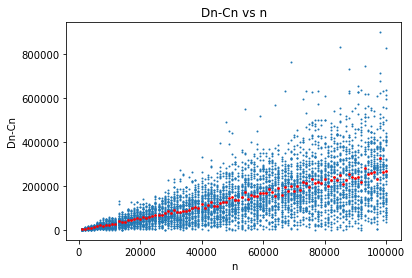

In [15]:
plt.scatter(df["n"], df["Dn-Cn"], s=1)             #here we do the graph
plt.scatter(df["n"].unique(), df2["Dn-Cn"], s=3, color= "red")
plt.title('Dn-Cn vs n')
plt.xlabel('n')
plt.ylabel('Dn-Cn')
plt.savefig("Dn-Cn_vs_n.pdf")

plt.show()

# CZĘŚĆ DALSZA

Podpunkt A

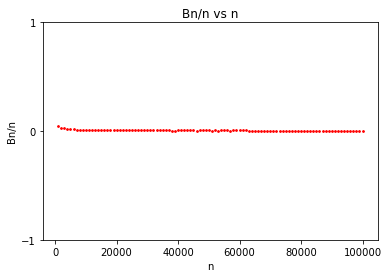

In [16]:
plt.scatter(df["n"].unique(), df2["Bn"].div(df["n"].unique()), s=3, color= "red")
plt.title('Bn/n vs n')
plt.xlabel('n')
plt.ylabel('Bn/n')
plt.yticks([-1,0,1])
plt.savefig("Bn_divided_by_n_rescaled_vs_n.pdf")

plt.show()

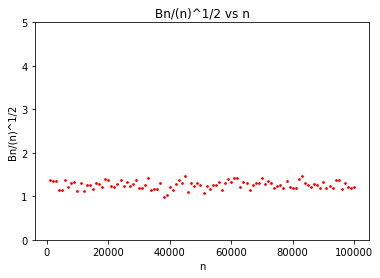

In [17]:
plt.scatter(df["n"].unique(), df2["Bn"].div((df["n"].unique())**(1/2)), s=3, color= "red")
plt.title('Bn/(n)^1/2 vs n')
plt.xlabel('n')
plt.ylabel('Bn/(n)^1/2')
plt.yticks([0,1,2,3,4,5])
plt.savefig("Bn_divided_by_sqrt(n)_vs_n.pdf")

plt.show()

Podpunkt B

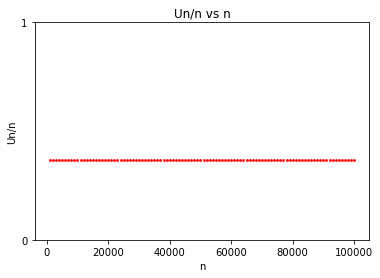

In [18]:
plt.scatter(df["n"].unique(), df2["Un"].div(df["n"].unique()), s=3, color= "red")
plt.title('Un/n vs n')
plt.xlabel('n')
plt.ylabel('Un/n')
plt.yticks([0,1])
plt.savefig("Un_divided_by_n_rescaled_vs_n.pdf")

plt.show()

Podpunkt C

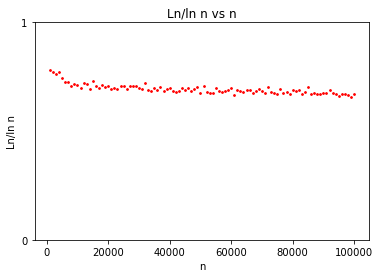

In [19]:
plt.scatter(df["n"].unique(), df2["Ln"].div(np.log(df["n"].unique())), s=3, color= "red")
plt.title('Ln/ln n vs n')
plt.xlabel('n')
plt.ylabel('Ln/ln n')
plt.yticks([0,1])
plt.savefig("Ln_divided_by_ln(n)_rescaled_vs_n.pdf")

plt.show()

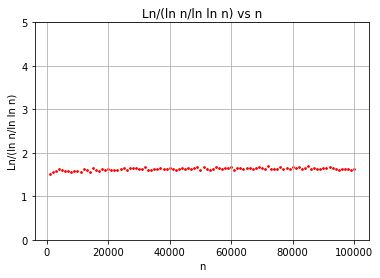

In [20]:
plt.scatter(df["n"].unique(), (df2["Ln"].div(np.log(df["n"].unique())))*(np.log(np.log(df["n"].unique()))), s=3, color= "red")
plt.title('Ln/(ln n/ln ln n) vs n')
plt.xlabel('n')
plt.ylabel('Ln/(ln n/ln ln n)')
plt.yticks([0,1,2,3,4,5])
plt.grid()
plt.savefig("Ln_divided_by_ln(n)_divided_by_ln(ln(n))_rescaled_vs_n.pdf")

plt.show()

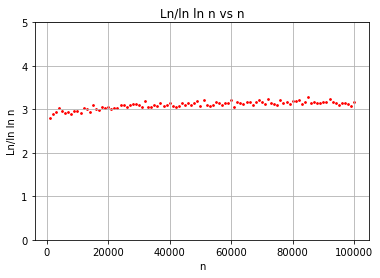

In [21]:
plt.scatter(df["n"].unique(), df2["Ln"].div(np.log(np.log(df["n"].unique()))), s=3, color= "red")
plt.title('Ln/ln ln n vs n')
plt.xlabel('n')
plt.ylabel('Ln/ln ln n')
plt.yticks([ 0,1,2,3,4,5]) 
plt.grid()
plt.savefig("Ln_divided_by_ln(ln(n))_rescaled_vs_n.pdf")

plt.show()

Podpunkt D

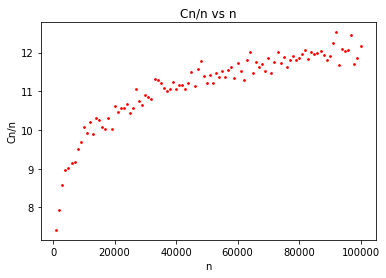

In [22]:
plt.scatter(df["n"].unique(), df2["Cn"].div(df["n"].unique()), s=3, color= "red")
plt.title('Cn/n vs n')
plt.xlabel('n')
plt.ylabel('Cn/n')

plt.savefig("Cn_divided_by_n_vs_n.pdf")

plt.show()

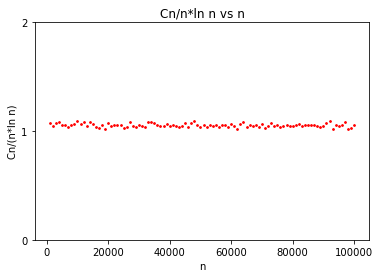

In [23]:
plt.scatter(df["n"].unique(), df2["Cn"].div(df["n"].unique()*np.log(df["n"].unique())), s=3, color= "red")
plt.title('Cn/n*ln n vs n')
plt.xlabel('n')
plt.ylabel('Cn/(n*ln n)')
plt.yticks([0, 1, 2]) 
plt.savefig("Cn_divided_by_n_times_ln(n)_rescaled_vs_n.pdf")


plt.show()

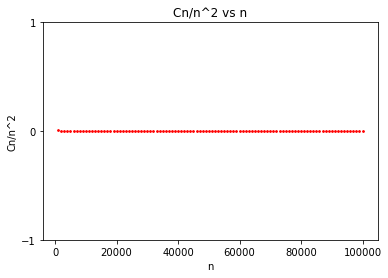

In [24]:
plt.scatter(df["n"].unique(), (df2["Cn"].div(df["n"].unique())).div(df["n"].unique()), s=3, color= "red")
plt.title('Cn/n^2 vs n')
plt.xlabel('n')
plt.ylabel('Cn/n^2')
plt.yticks([ -1,0,1]) 
plt.savefig("Cn_divided_by_n_squered_rescaled_vs_n.pdf")

plt.show()

Podpunkt E

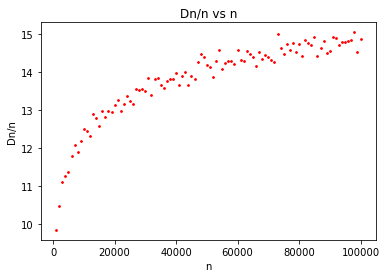

In [25]:
plt.scatter(df["n"].unique(), df2["Dn"].div(df["n"].unique()), s=3, color= "red")
plt.title('Dn/n vs n')
plt.xlabel('n')
plt.ylabel('Dn/n')
plt.savefig("Dn_divided_by_n_vs_n.pdf")

plt.show()

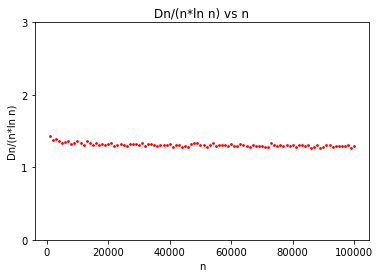

In [26]:
plt.scatter(df["n"].unique(), (df2["Dn"].div(df["n"].unique())).div(np.log(df["n"].unique())), s=3, color= "red")
plt.title('Dn/(n*ln n) vs n')
plt.xlabel('n')
plt.ylabel('Dn/(n*ln n)')
plt.yticks([ 0,1,2,3])
plt.savefig("Dn_divided_by_n_times_ln(n)_rescaled_vs_n.pdf")

plt.show()

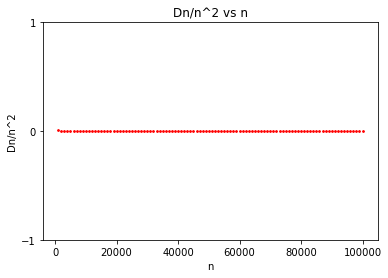

In [27]:
plt.scatter(df["n"].unique(), (df2["Dn"].div(df["n"].unique())).div(df["n"].unique()), s=3, color= "red")
plt.title('Dn/n^2 vs n')
plt.xlabel('n')
plt.ylabel('Dn/n^2')
plt.yticks([ -1,0,1])
plt.savefig("Dn_divided_by_n_squered_rescaled_vs_n.pdf")

plt.show()

Podpunkt F 

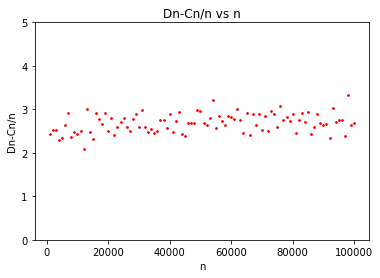

In [28]:
plt.scatter(df["n"].unique(), df2["Dn-Cn"].div(df["n"].unique()), s=3, color= "red")
plt.title('Dn-Cn/n vs n')
plt.xlabel('n')
plt.ylabel('Dn-Cn/n')
plt.yticks([0,1,2,3,4,5])
plt.savefig("Dn-Cn_divided_by_n_vs_n.pdf")

plt.show()

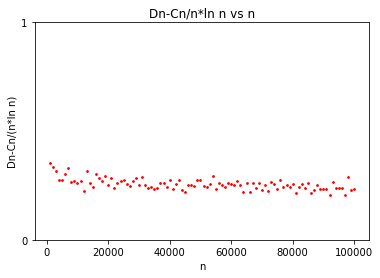

In [29]:
plt.scatter(df["n"].unique(), (df2["Dn-Cn"].div(df["n"].unique())).div(np.log(df["n"].unique())), s=3, color= "red")
plt.title('Dn-Cn/n*ln n vs n')
plt.xlabel('n')
plt.ylabel('Dn-Cn/(n*ln n)')
plt.yticks([0,1])
plt.savefig("Dn-Cn_divided_by_n_times_ln(n)_vs_n.pdf")

plt.show()

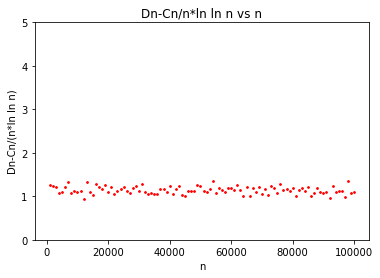

In [30]:
plt.scatter(df["n"].unique(), (df2["Dn-Cn"].div(df["n"].unique())).div(np.log(np.log(df["n"].unique()))), s=3, color= "red")
plt.title('Dn-Cn/n*ln ln n vs n')
plt.xlabel('n')
plt.ylabel('Dn-Cn/(n*ln ln n)')
plt.yticks([0,1,2,3,4,5])
plt.savefig("Dn-Cn_divided_by_n_times_ln(ln(n))_vs_n.pdf")

plt.show()